# IBM Employee Attrition
# Machine Learning Explainability

I choose the dataset because the variables are easy to understand and it would be intersting to evaluate their effect on model.


# 1- Importing The Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
import lightgbm as lgb
import catboost as ctb

# 2- Loading The Data

In [8]:
data = pd.read_csv('./data/HR-Employee-Attrition.csv')
data.shape

(1470, 35)

In [9]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


##### splitting data to train, validation and test sets

In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.2, random_state=42)
# checking the shape
train.shape, test.shape, val.shape

((940, 35), (294, 35), (236, 35))

# 3- Explanatory Data Analysis

The raw dataset has 35 columns and 1470 rows, we have 940 of instances in our train set.
Our target value is attrition which is a binary variable.

In [20]:
train.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,940.000000,940.000000,940.000000,940.000000,940.0,940.000000,940.000000,940.000000,940.000000,940.000000,...,940.000000,940.0,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,36.781915,790.525532,9.306383,2.907447,1.0,1018.918085,2.713830,66.535106,2.704255,2.056383,...,2.679787,80.0,0.814894,11.206383,2.773404,2.763830,7.040426,4.242553,2.107447,4.057447
std,9.187799,402.507736,8.109459,1.046800,0.0,612.039937,1.096038,20.353161,0.705813,1.111472,...,1.077713,0.0,0.845833,7.914207,1.325082,0.682639,6.238639,3.635510,3.126742,3.580639
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,454.500000,2.000000,2.000000,1.0,460.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,775.000000,7.000000,3.000000,1.0,1010.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1142.000000,14.000000,4.000000,1.0,1568.250000,4.000000,85.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2064.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


We begin by visualising the continious variables.

#### Age
Age has an almost normal distrbution and as we can see the younger employees are more likely to leave the company.

<AxesSubplot:xlabel='Age', ylabel='Density'>

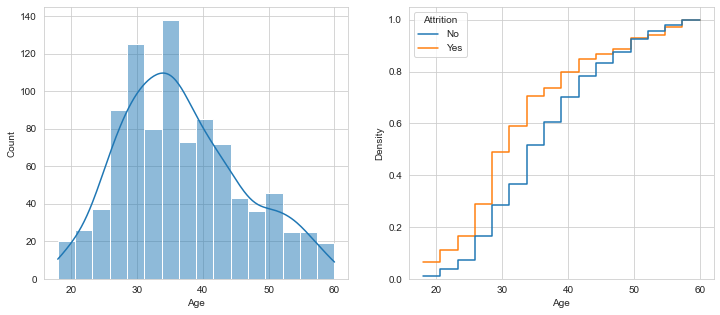

In [44]:
fig, ax =plt.subplots(1,2,figsize=(12, 5))
# histogram of age
sns.histplot(x='Age', kde=True, data=train, ax=ax[0])
# age histogram by target
sns.histplot(x='Age', hue='Attrition', cumulative= True,
             element="step", fill=False, stat="density",
             common_norm=False, data=train, ax=ax[1])

#### HourlyRate


<AxesSubplot:xlabel='HourlyRate', ylabel='Density'>

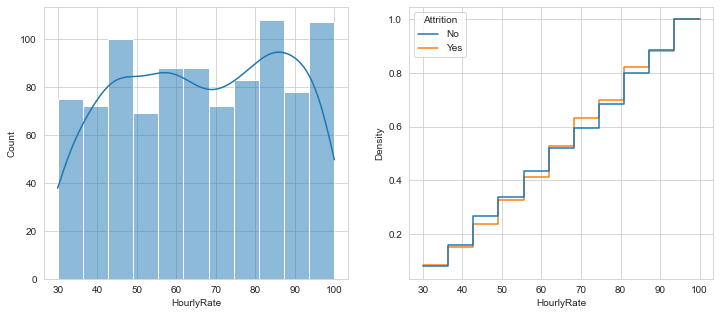

In [70]:
fig, ax =plt.subplots(1,2,figsize=(12, 5))
# histogram of hourlyrate
sns.histplot(x='HourlyRate', kde=True, data=train, ax=ax[0])
# hourlyrate histogram by target
sns.histplot(x='HourlyRate', hue='Attrition', cumulative= True,
             element="step", fill=False, stat="density",
             common_norm=False, data=train, ax=ax[1])

#### DailyRate
We see a unifoorm distribution for daily rate.

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

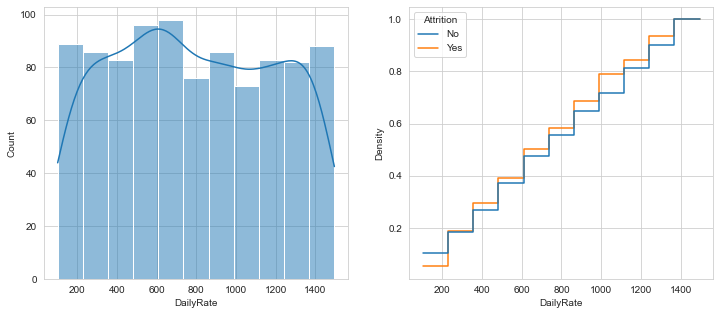

In [53]:
fig, ax =plt.subplots(1,2,figsize=(12, 5))
# histogram of age
sns.histplot(x='DailyRate', kde=True, data=train, ax=ax[0])
# age histogram by target
sns.histplot(x='DailyRate', hue='Attrition', cumulative= True,
             element="step", fill=False, stat="density",
             common_norm=False, data=train, ax=ax[1])

#### MontlyIncome
Those with lower monthly income are more likely to leave the company.

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

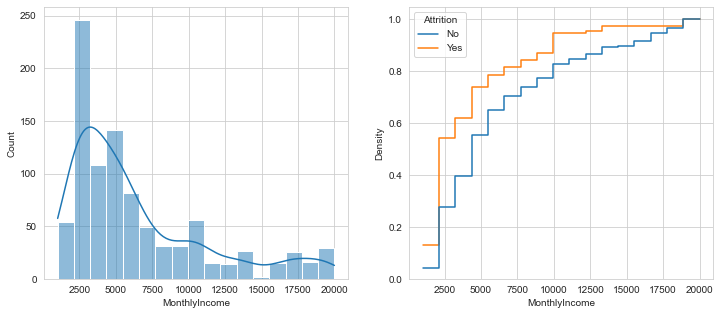

In [73]:
fig, ax =plt.subplots(1,2,figsize=(12, 5))
# histogram of monthly income
sns.histplot(x='MonthlyIncome', kde=True, data=train, ax=ax[0])
# monthly income histogram by target
sns.histplot(x='MonthlyIncome', hue='Attrition', cumulative= True,
             element="step", fill=False, stat="density",
             common_norm=False, data=train, ax=ax[1])


#### Distance From Home
As one would expect those who are closer to their workplace are less likley to leave.


<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

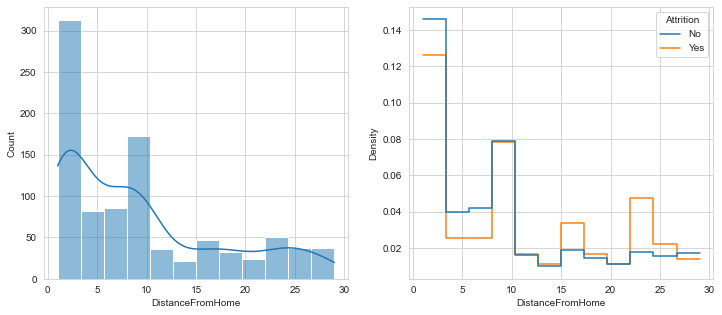

In [54]:
fig, ax =plt.subplots(1,2,figsize=(12, 5))
# histogram of distance from home
sns.histplot(x='DistanceFromHome', kde=True, data=train, ax=ax[0])
# distance from home histogram by target
sns.histplot(x='DistanceFromHome', hue='Attrition', cumulative= False,
             element="step", fill=False, stat="density",
             common_norm=False, data=train, ax=ax[1])

#### Environment Satisfaction

1 'Low', 2 'Medium', 3 'High', 4 'Very High'
Those who are unhappy with the environment are most likely to leave is a categorical variable.


<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='Density'>

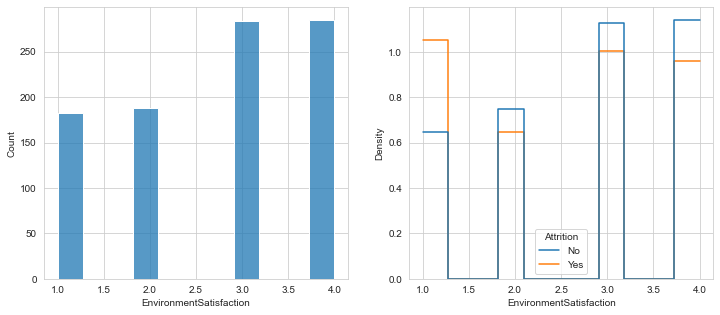

In [69]:
fig, ax =plt.subplots(1,2,figsize=(12, 5))
# histogram of employee count
sns.histplot(x='EnvironmentSatisfaction', kde=False, data=train, ax=ax[0])
# employee count histogram by target
sns.histplot(x='EnvironmentSatisfaction', hue='Attrition', cumulative= False,
             element="step", fill=False, stat="density",
             common_norm=False, data=train, ax=ax[1])

#### Education
Education
1- 'Below College', 2- 'College', 3- 'Bachelor', 4- 'Master', 5- 'Doctor'
education does not seem to play much role in attrition. Level 5 workers are more likely to stay


JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

<AxesSubplot:xlabel='Education', ylabel='Density'>

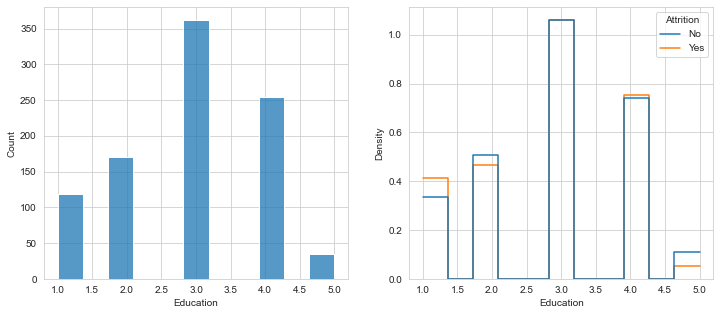

In [62]:
fig, ax =plt.subplots(1,2,figsize=(12, 5))
# histogram of education
sns.histplot(x='Education', kde=False, data=train, ax=ax[0])
# education histogram by target
sns.histplot(x='Education', hue='Attrition', cumulative= False,
             element="step", fill=False, stat="density",
             common_norm=False, data=train, ax=ax[1])

#### JobInvolvement

<AxesSubplot:xlabel='JobInvolvement', ylabel='Density'>

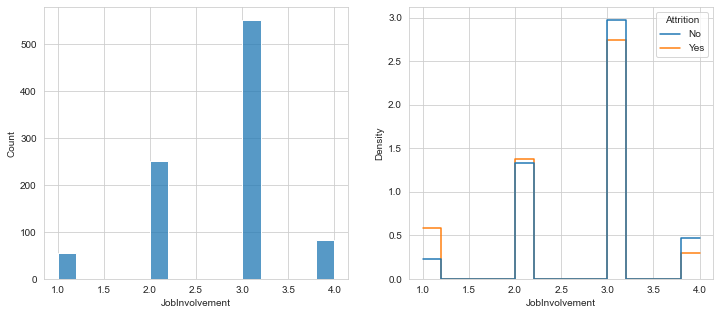

In [71]:
fig, ax =plt.subplots(1,2,figsize=(12, 5))
# histogram of job involvement
sns.histplot(x='JobInvolvement', kde=False, data=train, ax=ax[0])
# job involvement histogram by target
sns.histplot(x='JobInvolvement', hue='Attrition', cumulative= False,
             element="step", fill=False, stat="density",
             common_norm=False, data=train, ax=ax[1])